# 1.Data Exploration and Preprocessing
## 1.Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.


In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/376.0 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 1.8/376.0 MB 4.8 MB/s eta 0:01:19
   ---------------------------------------- 2.9/376.0 MB 4.7 MB/s eta 0:01:20
   ---------------------------------------- 3.7/376.0 MB 4.5 MB/s eta 0:01:24
    --------------------------------------- 5.2/376.0 MB 4.9 MB/s eta 0:01:16
    --------------------------------------- 6.8/376.0 MB 5.4 MB/s eta 0:01:09
    --------------------------------------- 7.9/376.0 MB 5.3 MB/s eta 0:01:09
    --------------------------------------- 9.2/376.0 MB 5.6 MB/s eta 0:01:06
   - -------------------------------------- 10.5/376.0 MB 5.7 MB/s eta 0:01:05
   - -------------------------------------- 11.3/376.0 MB 5.5 MB/s eta 0:01:07
   - -------------------------------------- 12.1/376.0 MB 5.2 MB/s eta 0:01:10
   - -------------------------------------- 12.6/376.0 MB 5.1 MB/s e

In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [124]:
pip install -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from scikeras.wrappers import KerasClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [21]:
df = pd.read_csv('Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [23]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


## 2.Execute necessary data preprocessing steps including data normalization, managing missing values.

In [24]:
print(df['xbox'].value_counts())

xbox
4     4477
3     4157
5     3169
2     2909
6     1894
1     1261
7     1006
8      513
9      284
0      132
10     121
11      48
12      20
13       4
14       3
15       2
Name: count, dtype: int64


In [25]:
df['xbox'] = df['xbox'].fillna(df['xbox'].mean())

In [26]:
df.drop(columns = 'letter',inplace = True)

In [27]:
df.isnull().sum()

xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

<Axes: >

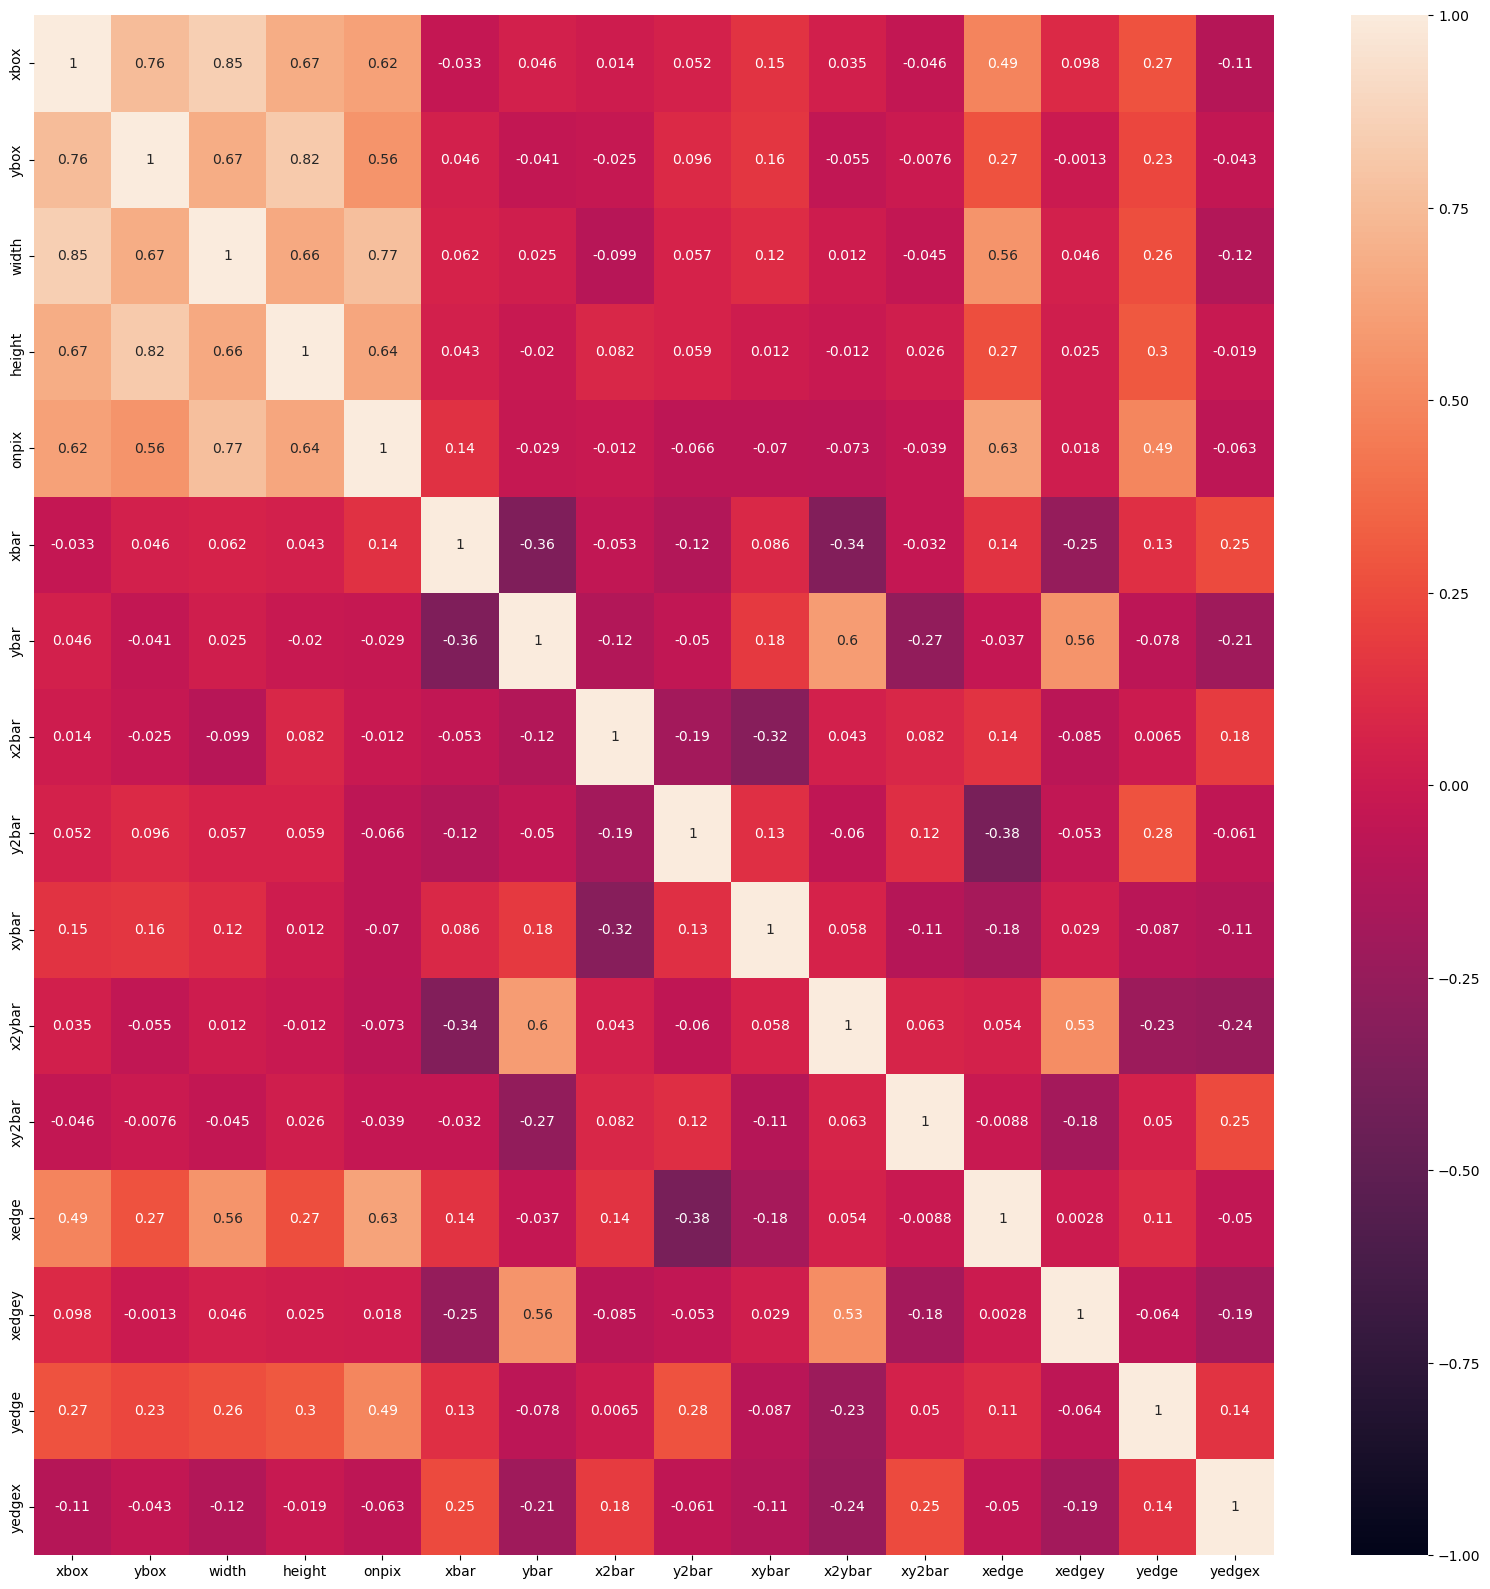

In [28]:
plt.rcParams['figure.figsize']=(20,20)
sns.heatmap((df.corr()),vmin =-1,vmax=1,annot=True)

<Axes: >

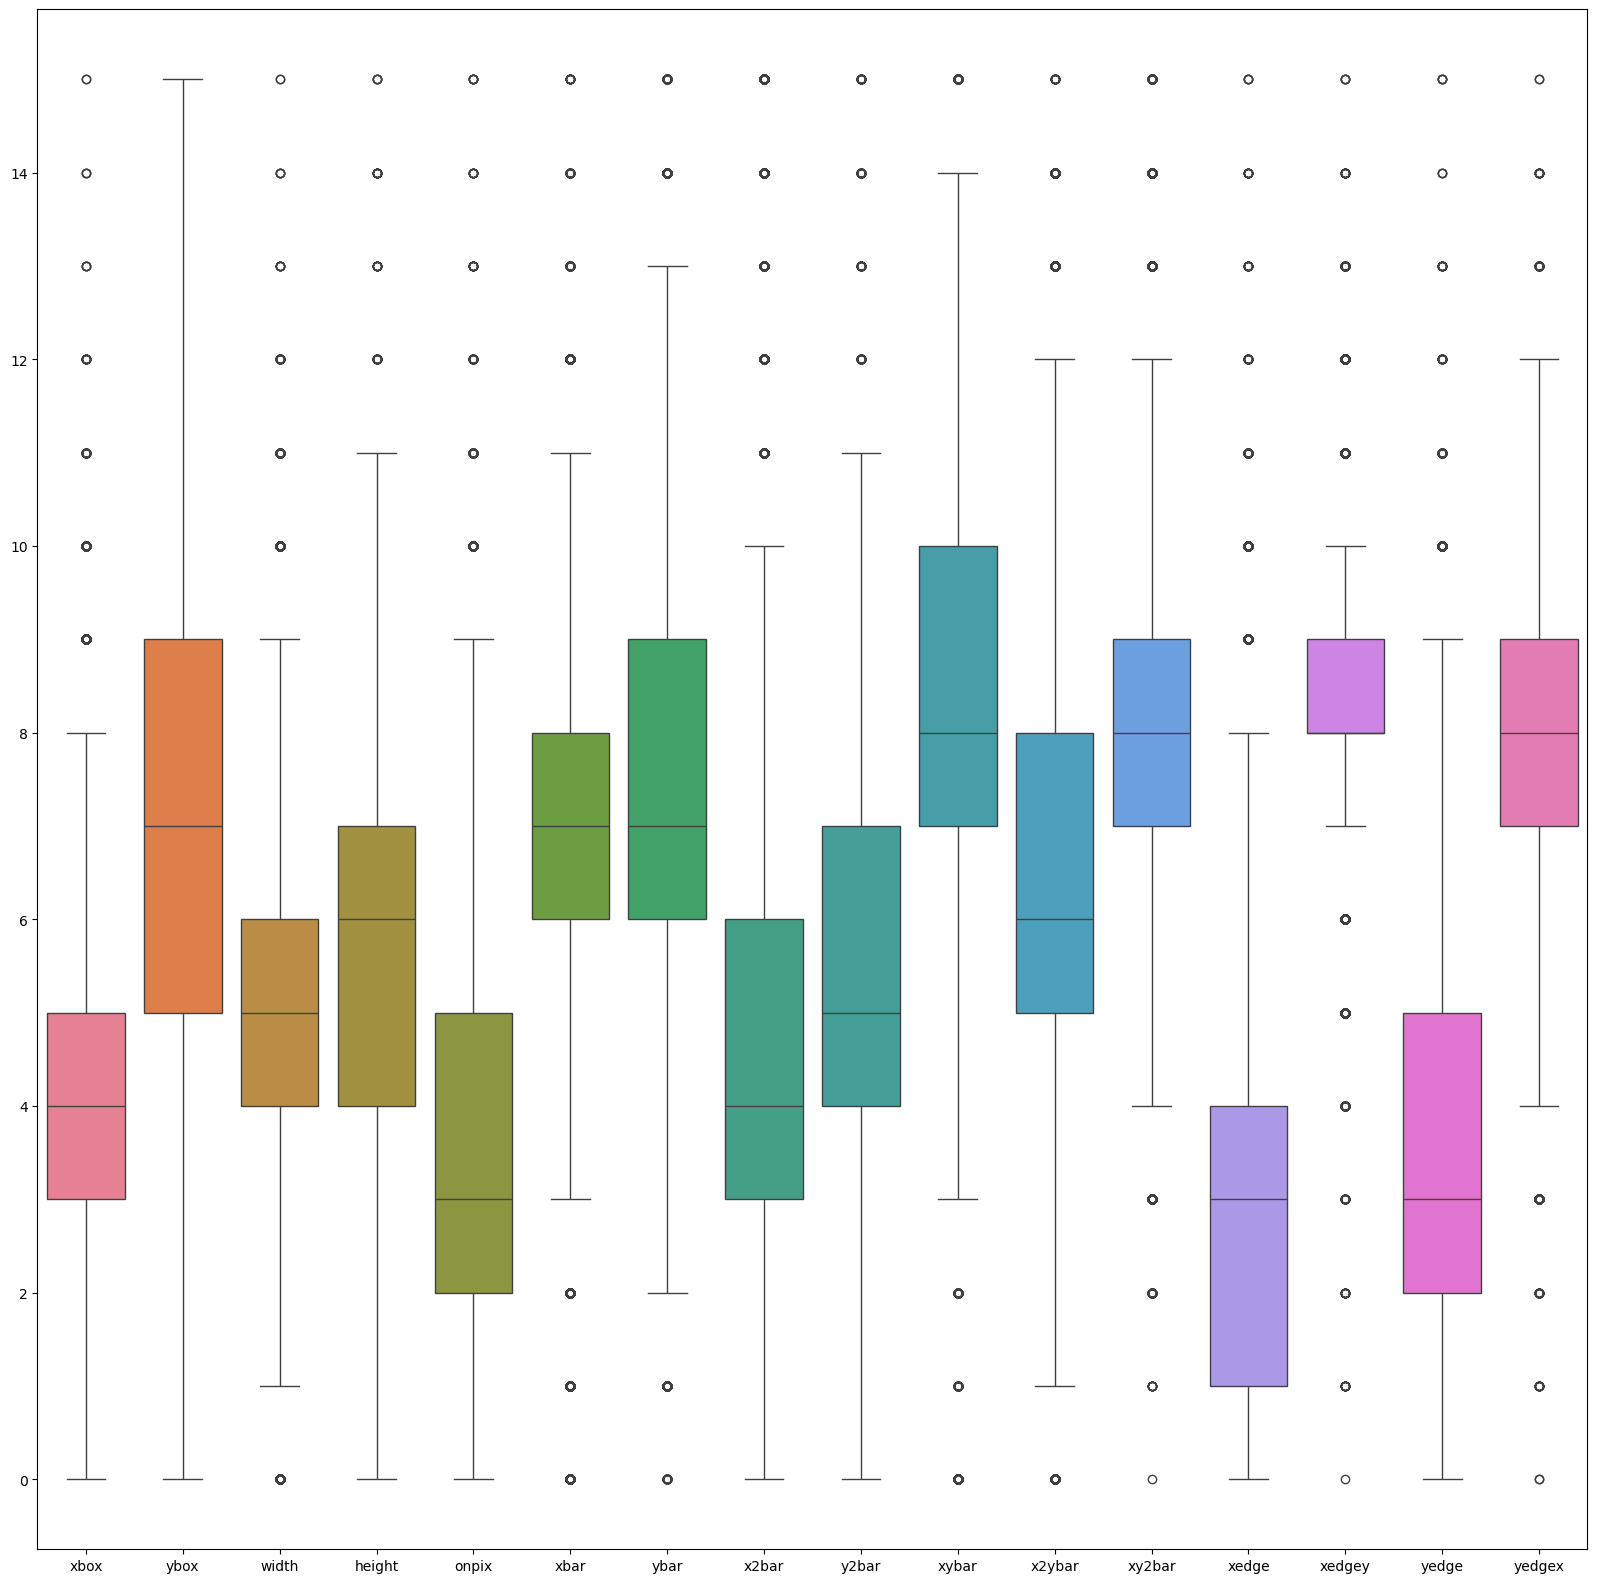

In [29]:
sns.boxplot(df)

# 2. Model Implementation
## ●	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
## ●	Divide the dataset into training and test sets.
## ●	Train your model on the training set and then use it to make predictions on the test set.


In [105]:
X = df.drop(columns=['width'])  
y = df['height']

In [106]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [107]:
importances = rf.feature_importances_

In [108]:
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_columns =df.columns[:-1][indices]

Text(0.5, 1.0, 'Feature Importances Analysis using Random Forest')

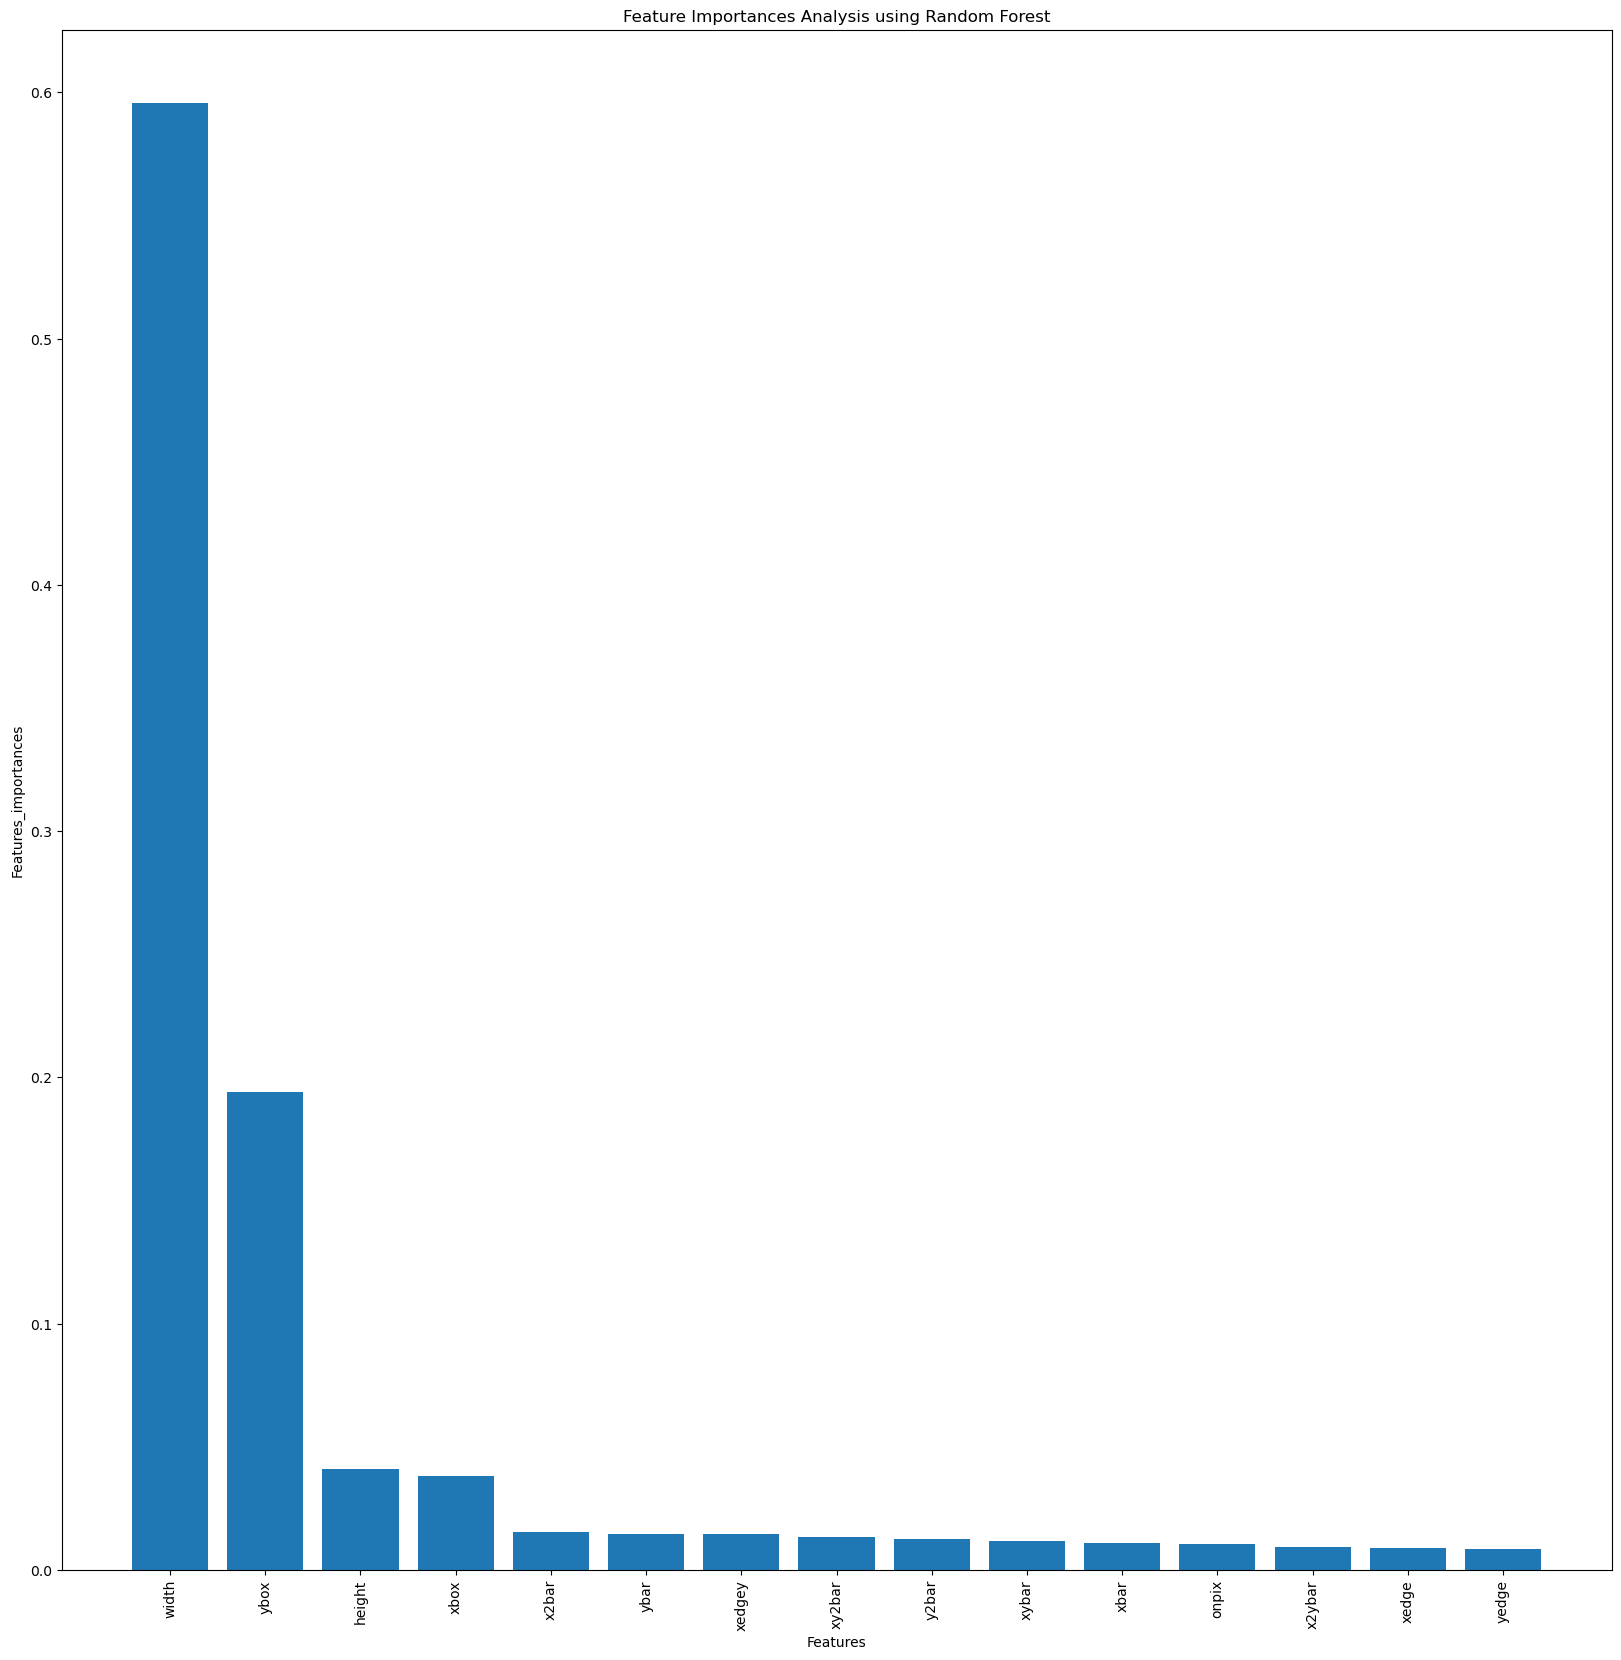

In [109]:
plt.bar(sorted_columns,sorted_importances)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Features_importances')
plt.title("Feature Importances Analysis using Random Forest")

In [110]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([5, 7, 8, ..., 7, 2, 6], dtype=int64)

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.0576983 ,  0.29187713, -0.16470367, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 ,  0.71973007, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  1.16194694, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.71973007, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -1.49135429, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.2775132 , ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [112]:
pca = PCA()
pca.fit_transform(X_scaled)
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.23481558, 0.40892422, 0.52351678, 0.61439283, 0.68413843,
       0.74942248, 0.80775534, 0.84946939, 0.88890049, 0.91904603,
       0.94728208, 0.96499042, 0.98185069, 0.99210609, 1.        ])

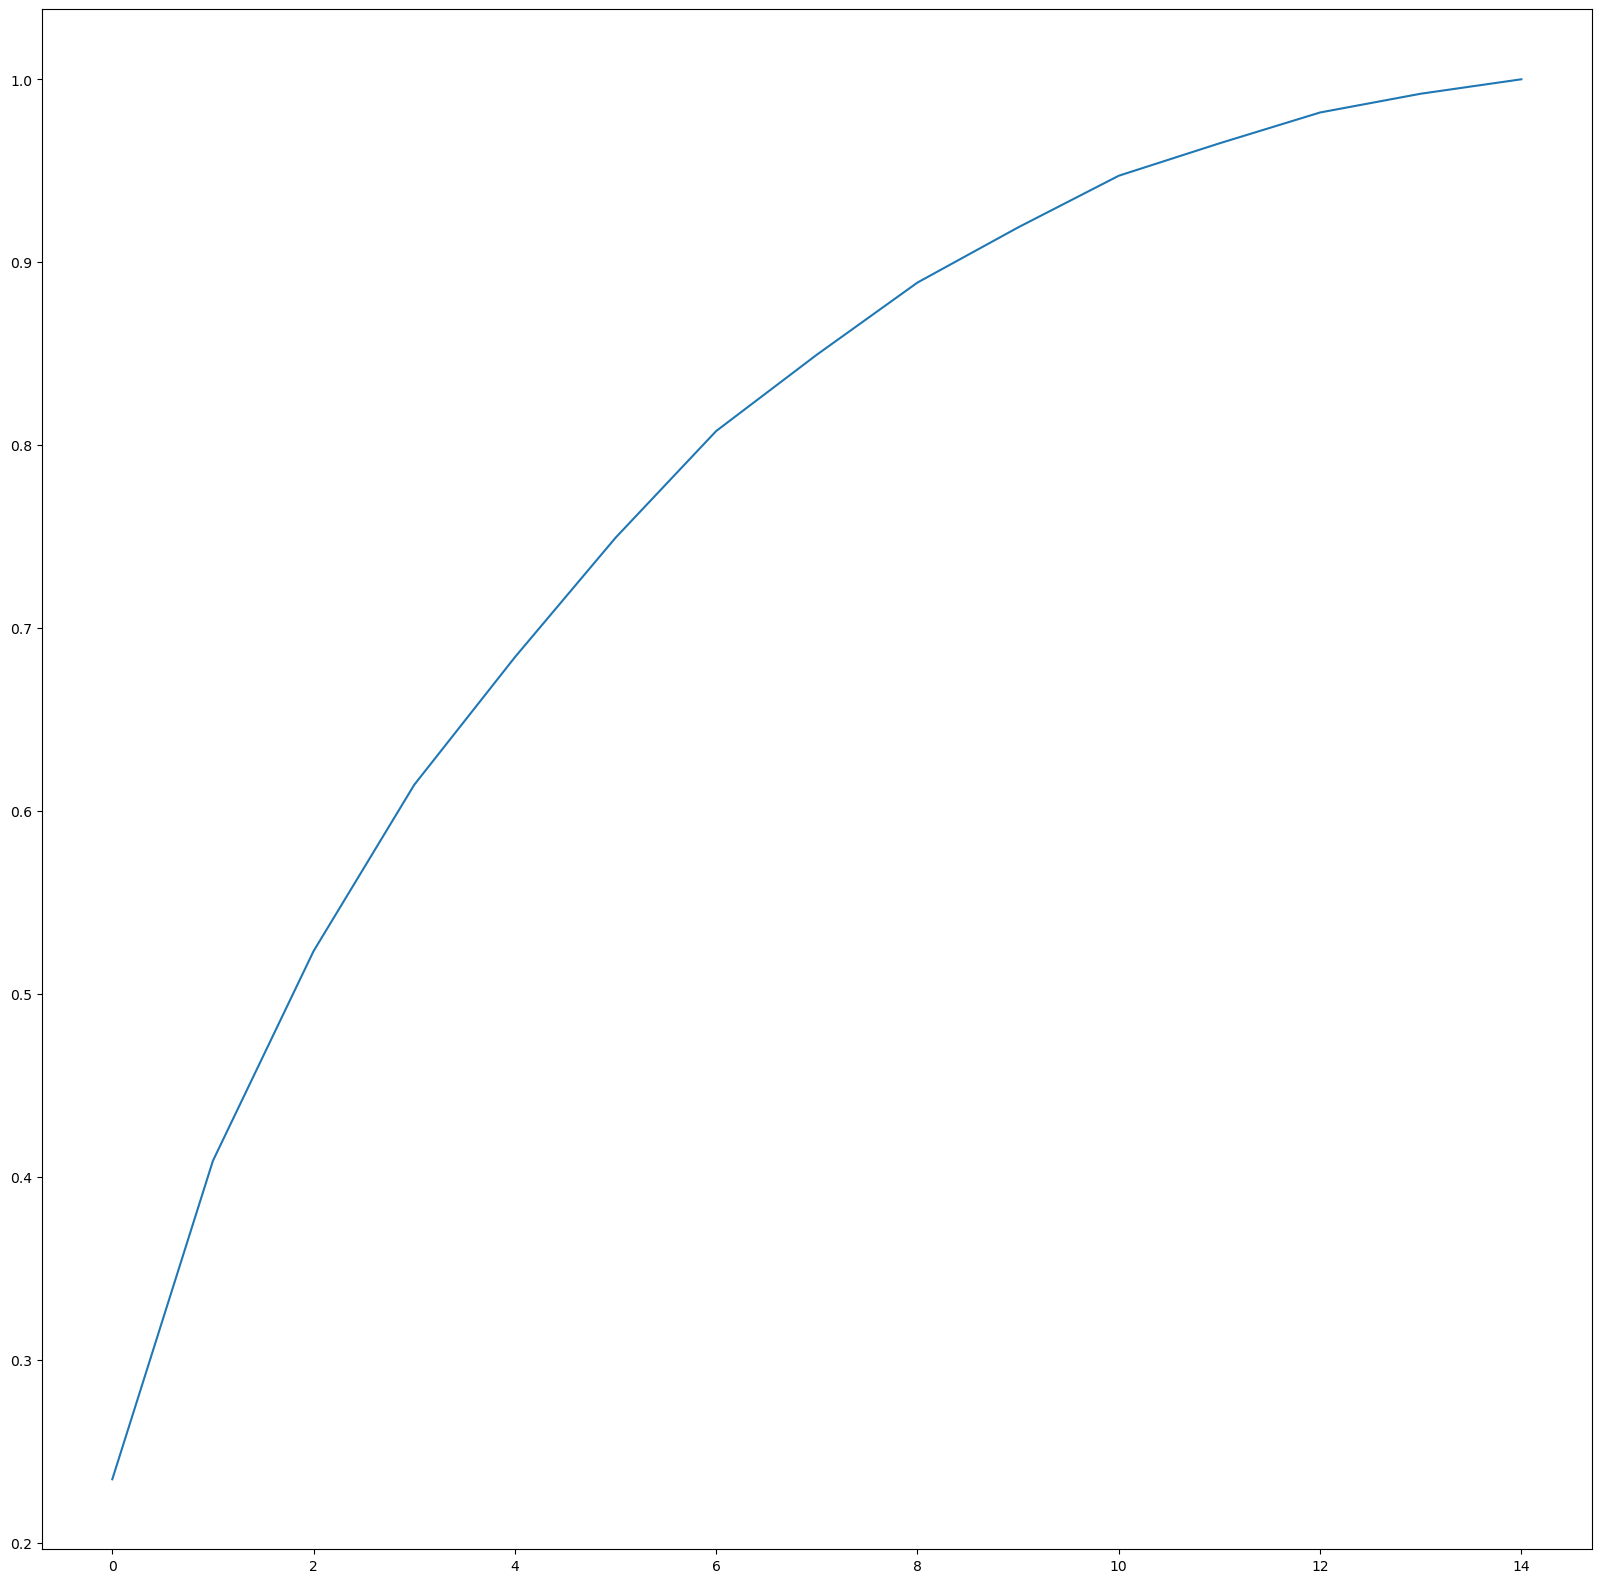

In [113]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [115]:
print(X_train)

[[-0.01230945 -0.01074302 -0.16470367 ... -0.21908163  0.12008142
   0.12291107]
 [-0.01230945 -0.01074302 -0.16470367 ... -0.21908163  0.12008142
  -0.49535386]
 [-0.53500387 -0.6159833  -1.04913741 ...  0.42746295 -0.65903564
  -1.11361878]
 ...
 [-0.53500387 -0.91860345 -1.04913741 ... -0.8656262  -0.26947711
   0.74117599]
 [-0.53500387  0.29187713  0.2775132  ... -0.21908163 -1.04859417
  -0.49535386]
 [-1.58039272 -1.22122359 -1.49135429 ... -0.8656262  -1.4381527
  -0.49535386]]


In [116]:
print(X_test)

[[-0.53500387 -0.31336316  0.2775132  ... -0.8656262   1.288757
  -1.11361878]
 [-0.01230945  1.19973756  1.16194694 ...  1.7205521   1.288757
  -1.73188371]
 [-0.53500387 -0.91860345 -1.04913741 ... -1.51217078 -0.65903564
   0.12291107]
 ...
 [ 0.51038497  0.89711742  1.60416381 ... -0.21908163  0.12008142
   0.12291107]
 [-0.01230945 -0.6159833   0.71973007 ...  1.07400752  2.06787406
  -1.73188371]
 [-1.0576983  -0.6159833  -0.60692054 ...  1.7205521  -0.65903564
   0.12291107]]


# 3. Hyperparameter Tuning
## ●	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
## ●	Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.


In [117]:
# initialized the model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units=10,activation='relu'))

# Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

# Established the connection between layers
ann.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

# Fit the data
ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0385 - loss: 1.3442
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0369 - loss: 1.3181
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0380 - loss: 1.1758
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0404 - loss: 1.1620
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0388 - loss: 1.1408
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0375 - loss: 1.0081
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0400 - loss: 0.8681
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0379 - loss: 0.9812
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0370 - loss: 0.7729
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0373 - loss: 0.7031
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0372 - loss: 0.6386
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━

In [118]:
y_pred = ann.predict(X_test)
y_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.7925473 ],
       [0.90012926],
       [0.54202867],
       ...,
       [0.7316661 ],
       [0.81417525],
       [0.5943414 ]], dtype=float32)

In [119]:
y_pred = y_pred >0
y_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

# 4. Evaluation
## ●	Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
## ●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [122]:
print('Classification_report:')
print(classification_report(y_pred,y_test,zero_division = 1))
print('Accuracy Score',accuracy_score(y_pred,y_test))

Classification_report:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.04      0.08      4000
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.00      1.00      0.00         0
           6       0.00      1.00      0.00         0
           7       0.00      1.00      0.00         0
           8       0.00      1.00      0.00         0
           9       0.00      1.00      0.00         0
          10       0.00      1.00      0.00         0
          11       0.00      1.00      0.00         0
          12       0.00      1.00      0.00         0
          13       0.00      1.00      0.00         0
          14       0.00      1.00      0.00         0
          15       0.00      1.00      0.00         0

    accuracy                           0.04      4000
   

In [129]:
def optimizer_selection(hp):
    #initialize the model
    model = Sequential()
    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
    #Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop'])
    model.compile(optimizer=optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [130]:
tuner = kt.RandomSearch(
    optimizer_selection,
    objective = 'val_accuracy',
    max_trials=3
)

In [132]:
tuner.search(X_train,y_train, epochs = 3, validation_data = (X_test,y_test))

Trial 3 Complete [00h 00m 17s]
val_accuracy: 0.04149999842047691

Best val_accuracy So Far: 0.04149999842047691
Total elapsed time: 00h 00m 53s


In [133]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [134]:
model1 = tuner.get_best_models(num_models=1)[0]
model1.fit(X_train,y_train, epochs = 100, validation_data = (X_test,y_test))

Epoch 1/100


C:\Users\psara\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0424 - loss: -37.9189 - val_accuracy: 0.0415 - val_loss: -87.0998
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0454 - loss: -112.9765 - val_accuracy: 0.0415 - val_loss: -204.2768
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0410 - loss: -245.7705 - val_accuracy: 0.0415 - val_loss: -378.2839
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0447 - loss: -431.6792 - val_accuracy: 0.0415 - val_loss: -610.6838
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0439 - loss: -683.2160 - val_accuracy: 0.0415 - val_loss: -899.2889
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0440 - loss: -983.9155 - val_accuracy: 0.0415 - val_loss: -1245.3152
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0471 - loss: -1345.5237 - val_accuracy: 0.0415 - val_loss: -1647.5830
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0

In [135]:
# High Accuracy columns values in the dataset list
importances = rf.feature_importances_
feature_names = X.columns  
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

   Feature  Importance
2   height    0.595586
1     ybox    0.194189
3    onpix    0.041092
0     xbox    0.038172
7    y2bar    0.015527
6    x2bar    0.014743
13   yedge    0.014711
11   xedge    0.013527
8    xybar    0.012652
9   x2ybar    0.011560
5     ybar    0.011088
4     xbar    0.010613
10  xy2bar    0.009383
12  xedgey    0.008677
14  yedgex    0.008479
